In [13]:
import os
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def show_image(image):
    image = torch.tensor(image)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

(346, 182, 3)
[[[0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  ...
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]]

 [[0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  ...
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]]

 [[0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  ...
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]
  [0.70588235 0.77647059 0.90588235]]

 ...

 [[0.97254902 0.79607843 0.67843137]
  [0.97254902 0.79607843 0.67843137]
  [0.97254902 0.79607843 0.67843137]
  ...
  [0.97254902 0.79607843 0.67843137]
  [0.97254902 0.79607843 0.67843137]
  [0.97254902 0.79607843 0.67843137]]

 [[0.97254902 0.79607843 0.67843137]
  [0.97254902 0.7960784

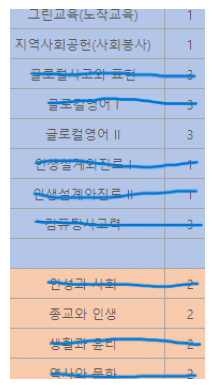

In [53]:
# 이미지 경로
image_path = 'gyopil.png'

# 이미지 불러오기
image = Image.open(image_path).convert("RGB")
image = np.array(image) / 255.0
print(image.shape)
print(image)

show_image(image)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7020\1647954375.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.9646, 0.9646, 0.9646,  ..., 0.9646, 0.9646, 0.9646],
         [0.9646, 0.9646, 0.9646,  ..., 0.9646, 0.9646, 0.9646],
         [0.9646, 0.9646, 0.9646,  ..., 0.9646, 0.9646, 0.9646],
         ...,
         [2.1290, 2.1290, 2.1290,  ..., 2.1290, 2.1290, 2.1290],
         [2.1290, 2.1290, 2.1290,  ..., 2.1290, 2.1290, 2.1290],
         [2.1290, 2.1290, 2.1290,  ..., 2.1290, 2.1290, 2.1290]],

        [[1.4307, 1.4307, 1.4307,  ..., 1.4307, 1.4307, 1.4307],
         [1.4307, 1.4307, 1.4307,  ..., 1.4307, 1.4307, 1.4307],
         [1.4307, 1.4307, 1.4307,  ..., 1.4307, 1.4307, 1.4307],
         ...,
         [1.5182, 1.5182, 1.5182,  ..., 1.5182, 1.5182, 1.5182],
         [1.5182, 1.5182, 1.5182,  ..., 1.5182, 1.5182, 1.5182],
         [1.5182, 1.5182, 1.5182,  ..., 1.5182, 1.5182, 1.5182]],

        [[2.2217, 2.2217, 2.2217,  ..., 2.2217, 2.2217, 2.2217],
         [2.2217, 2.2217, 2.2217,  ..., 2.2217, 2.2217, 2.2217],
         [2.2217, 2.2217, 2.2217,  ..., 2.2217, 2.2217, 2.

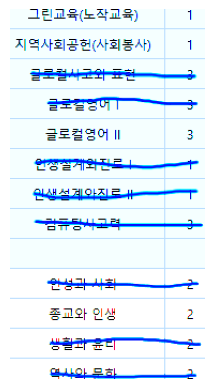

In [54]:
# transform 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize((224, 224))
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# transform 적용
transformed_image = transform(image)

print(transformed_image)
show_image(transformed_image.permute(1, 2, 0))

In [57]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# 사전 훈련된 모델 불러오기
model = fasterrcnn_resnet50_fpn(pretrained=True)

# 모델을 평가 모드로 설정
model.eval()

# 모델에 입력 이미지 전달
with torch.no_grad():
    outputs = model(transformed_image.unsqueeze(0))

# 출력 확인
print(outputs)

c:\Users\USER\anaconda3\envs\MP\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USER\anaconda3\envs\MP\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: expected scalar type Double but found Float